In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data_path = '/Users/nelsschimek/Documents/codeProjects/basketball_analysis/wehoop-wnba-data/wnba/team_box/csv/'

In [49]:
file_list = os.listdir(data_path)
file_list = [file for file in file_list if file.endswith('.csv')]
file_list

['team_box_2010.csv',
 'team_box_2004.csv',
 'team_box_2005.csv',
 'team_box_2011.csv',
 'team_box_2007.csv',
 'team_box_2013.csv',
 'team_box_2012.csv',
 'team_box_2006.csv',
 'team_box_2016.csv',
 'team_box_2017.csv',
 'team_box_2003.csv',
 'team_box_2015.csv',
 'team_box_2014.csv',
 'team_box_2019.csv',
 'team_box_2024.csv',
 'team_box_2018.csv',
 'team_box_2023.csv',
 'team_box_2022.csv',
 'team_box_2020.csv',
 'team_box_2008.csv',
 'team_box_2009.csv',
 'team_box_2021.csv']

In [59]:
team_box = pd.read_csv(data_path + 'team_box_2003.csv')
team_box.columns

Index(['game_id', 'season', 'season_type', 'game_date', 'game_date_time',
       'team_id', 'team_uid', 'team_slug', 'team_location', 'team_name',
       'team_abbreviation', 'team_display_name', 'team_short_display_name',
       'team_color', 'team_alternate_color', 'team_logo', 'team_home_away',
       'team_score', 'team_winner', 'assists', 'blocks', 'defensive_rebounds',
       'field_goal_pct', 'field_goals_made', 'field_goals_attempted',
       'flagrant_fouls', 'fouls', 'free_throw_pct', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'steals',
       'team_turnovers', 'technical_fouls', 'three_point_field_goal_pct',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'total_rebounds', 'total_technical_fouls', 'total_turnovers',
       'turnovers', 'opponent_team_id', 'opponent_team_uid',
       'opponent_team_slug', 'opponent_team_location', 'opponent_team_name',
       'opponent_team_abbreviation', 'opponent_team_display

In [52]:
# Seperate out regular season
regular_season = team_box[team_box['season_type'] == 2]
one_game = regular_season[regular_season['game_id'] == 401507365]
one_game.head()

,game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,...,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score
46,401507365,2023,2,2023-09-10,2023-09-10T17:00:00Z,19,s:40~l:59~t:19,chicago-sky,Chicago,Sky,...,connecticut-sun,Connecticut,Sun,CONN,Connecticut Sun,Sun,f05023,0a2240,https://a.espncdn.com/i/teamlogos/wnba/500/con...,91
47,401507365,2023,2,2023-09-10,2023-09-10T17:00:00Z,18,s:40~l:59~t:18,connecticut-sun,Connecticut,Sun,...,chicago-sky,Chicago,Sky,CHI,Chicago Sky,Sky,5091cd,ffd520,https://a.espncdn.com/i/teamlogos/wnba/500/chi...,102


In [62]:
columns_of_interest = [
    'game_id', 'season',
    'team_color', 'team_score', 'team_winner', 'assists', 'blocks', 'defensive_rebounds',
        'field_goal_pct', 'field_goals_made',
       'field_goals_attempted', 'free_throw_pct',
       'free_throws_made', 'free_throws_attempted', 'largest_lead',
       'offensive_rebounds', 'steals',
        'three_point_field_goal_pct',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'total_rebounds', 'total_turnovers',
       'turnovers',
]

In [54]:
stats_df = one_game[columns_of_interest]
stats_df.head()

,game_id,season,team_color,team_score,team_winner,assists,blocks,defensive_rebounds,fast_break_points,field_goal_pct,...,offensive_rebounds,points_in_paint,steals,three_point_field_goal_pct,three_point_field_goals_made,three_point_field_goals_attempted,total_rebounds,total_turnovers,turnover_points,turnovers
46,401507365,2023,5091cd,102,True,28,4,32,23,54.2,...,6,44,6,52.2,12,23,38,17,19,17
47,401507365,2023,f05023,91,False,21,3,26,23,41.0,...,10,42,9,30.4,7,23,36,10,8,10


In [63]:
full_season_stats = regular_season[columns_of_interest]
full_season_stats

,game_id,season,team_color,team_score,team_winner,assists,blocks,defensive_rebounds,field_goal_pct,field_goals_made,...,free_throws_attempted,largest_lead,offensive_rebounds,steals,three_point_field_goal_pct,three_point_field_goals_made,three_point_field_goals_attempted,total_rebounds,total_turnovers,turnovers
32,300822005,2010,005084,83,True,8,0,29,35.3,30,...,23,NaN,15,8,21.4,3,14,44,9,9
33,300822005,2010,e2382f,79,False,16,8,36,39.3,22,...,40,NaN,8,3,33.3,6,18,44,20,20
34,300822009,2010,de6b36,87,False,18,4,32,44.7,34,...,12,NaN,7,4,42.1,8,19,39,13,13
35,300822009,2010,0d79b9,88,True,20,3,30,42.5,34,...,14,NaN,8,11,53.3,8,15,38,8,7
36,300822017,2010,3a267d,82,False,14,2,29,44.4,28,...,21,NaN,11,5,36.4,8,22,40,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,300515005,2010,e2382f,65,False,16,8,9,0.0,25,...,16,NaN,13,12,33.3,6,18,22,17,15
438,300515018,2010,4f91cd,61,False,12,3,25,0.0,25,...,11,NaN,7,9,6.7,1,15,32,15,14
439,300515018,2010,de6b36,74,True,12,1,30,0.0,25,...,17,NaN,11,6,40.9,9,22,41,18,17
440,300515011,2010,532481,77,False,18,1,26,0.0,31,...,16,NaN,14,13,20.0,5,25,40,13,13


In [81]:
historical_regular_season_box_data = pd.DataFrame()

for file in file_list:
    print(file)
    team_box = pd.read_csv(data_path + file)
    regular_season = team_box[team_box['season_type'] == 2]
    print(regular_season.shape)
    historical_regular_season_box_data = pd.concat([historical_regular_season_box_data, regular_season[columns_of_interest]])

team_box_2010.csv
(410, 54)
team_box_2004.csv
(394, 54)
team_box_2005.csv
(426, 54)
team_box_2011.csv
(412, 54)
team_box_2007.csv
(444, 54)
team_box_2013.csv
(410, 54)
team_box_2012.csv
(406, 54)
team_box_2006.csv
(474, 54)
team_box_2016.csv
(408, 54)
team_box_2017.csv
(410, 54)
team_box_2003.csv
(368, 54)
team_box_2015.csv
(410, 54)
team_box_2014.csv
(410, 54)
team_box_2019.csv
(410, 54)
team_box_2024.csv
(298, 57)
team_box_2018.csv
(408, 54)
team_box_2023.csv
(484, 57)
team_box_2022.csv
(436, 54)
team_box_2020.csv
(264, 54)
team_box_2008.csv
(472, 54)
team_box_2009.csv
(444, 54)
team_box_2021.csv
(388, 54)


In [82]:
historical_regular_season_box_data['season'].unique()

array([2010, 2004, 2005, 2011, 2007, 2013, 2012, 2006, 2016, 2017, 2003,
       2015, 2014, 2019, 2024, 2018, 2023, 2022, 2020, 2008, 2009, 2021])

In [113]:
num_games = historical_regular_season_box_data.groupby('season')['game_id'].nunique()
points_per_season = historical_regular_season_box_data.groupby('season')['team_score'].sum()
assists_per_season = historical_regular_season_box_data.groupby('season')['assists'].sum()
three_point_field_goals_made_per_season = historical_regular_season_box_data.groupby('season')['three_point_field_goals_made'].sum()
three_point_fga_per_season = historical_regular_season_box_data.groupby('season')['three_point_field_goals_attempted'].sum()
rebounds_per_season = historical_regular_season_box_data.groupby('season')['total_rebounds'].sum()
turnovers_per_season = historical_regular_season_box_data.groupby('season')['total_turnovers'].sum()

points_per_game_per_season = (points_per_season / num_games)//2
assists_per_game_per_season = assists_per_season / num_games
three_point_field_goals_made_per_game_per_season = three_point_field_goals_made_per_season / num_games
three_point_fga_per_game_per_season = three_point_fga_per_season / num_games
rebounds_per_game_per_season = rebounds_per_season / num_games
turnovers_per_game_per_season = turnovers_per_season / num_games


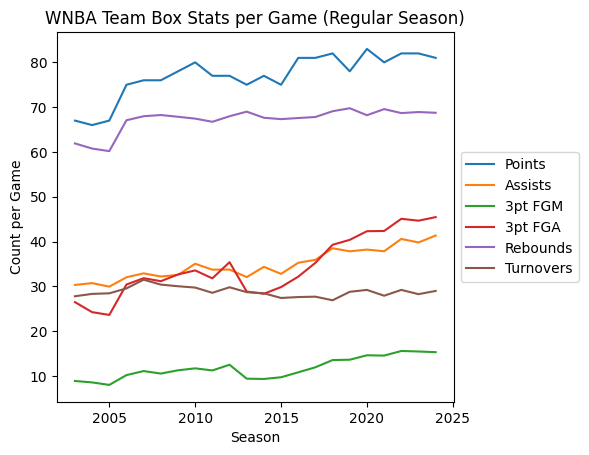

In [119]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(points_per_game_per_season.index, points_per_game_per_season, label='Points')
ax.plot(assists_per_game_per_season.index, assists_per_game_per_season, label='Assists')
ax.plot(three_point_field_goals_made_per_game_per_season.index, three_point_field_goals_made_per_game_per_season, label='3pt FGM')
ax.plot(three_point_fga_per_game_per_season.index, three_point_fga_per_game_per_season, label='3pt FGA')
ax.plot(rebounds_per_game_per_season.index, rebounds_per_game_per_season, label='Rebounds')
ax.plot(turnovers_per_game_per_season.index, turnovers_per_game_per_season, label='Turnovers')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Count per Game')
plt.xlabel('Season')

plt.title('WNBA Team Box Stats per Game (Regular Season)')

plt.show()